In [2]:
import sys
sys.path.append('../')  # Add the parent directory to the module search path

import pandas as pd
import matplotlib.pyplot as plt
from src.loader import load_data
from src.utils import parse_url

# Specify the path to the CSV file
data_file_path = '../data/data.csv'
rating_file_path = '../data/rating.csv'
raw_data_file_path = '../data/raw-data.csv'
traffic_data_file_path = '../data/traffic.csv'
domains_location_file_path = '../data/domains_location.csv'

## Loading data using the custom loader module from the src package.

In [3]:
data = load_data(data_file_path)

In [18]:
rating = load_data(rating_file_path)

In [18]:
raw_data = load_data(raw_data_file_path)

In [4]:
traffic = load_data(traffic_data_file_path)

In [ ]:
domains_location = load_data(domains_location_file_path)

In [6]:
data_column_names = data.columns
print(data_column_names)

Index(['article_id', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'category', 'full_content'],
      dtype='object')


In [5]:
data.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content
0,89541,NaN,International Business Times,Paavan MATHEMA,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,https://www.ibtimes.com/un-chief-urges-world-s...,https://d.ibtimes.com/en/full/4496078/nepals-g...,2023-10-30 10:12:35.000000,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...
1,89542,NaN,Prtimes.jp,NaN,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,https://prtimes.jp/main/html/rd/p/000000147.00...,https://prtimes.jp/i/32220/147/ogp/d32220-147-...,2023-10-06 04:40:02.000000,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,NaN
2,89543,NaN,VOA News,webdesk@voanews.com (Agence France-Presse),UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,https://www.voanews.com/a/un-chief-urges-world...,https://gdb.voanews.com/01000000-0a00-0242-60f...,2023-10-30 10:53:30.000000,"Kathmandu, Nepal UN Secretary-General Antonio...",Nepal,NaN
3,89545,NaN,The Indian Express,Editorial,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,https://indianexpress.com/article/opinion/edit...,https://images.indianexpress.com/2023/10/edit-...,2023-10-06 01:20:24.000000,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...
4,89547,NaN,The Times of Israel,Jacob Magid,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...",https://www.timesofisrael.com/200-foreigners-d...,https://static.timesofisrael.com/www/uploads/2...,2023-10-27 01:08:34.000000,"Scores of foreign citizens were killed, taken ...",Nepal,NaN


In [9]:
domains_location_column_names = domains_location.columns
print(domains_location_column_names)

Index(['SourceCommonName', 'location', 'Country'], dtype='object')


In [10]:
rating_column_names = rating.columns
print(rating_column_names)

Index(['article_id', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'category', 'article', 'title_sentiment'],
      dtype='object')


In [11]:
raw_data_column_names = raw_data.columns
print(raw_data_column_names)

Index(['article_id', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'category'],
      dtype='object')


In [13]:
traffic_column_names = traffic.columns
print(traffic_column_names)

Index(['GlobalRank', 'TldRank', 'Domain', 'TLD', 'RefSubNets', 'RefIPs',
       'IDN_Domain', 'IDN_TLD', 'PrevGlobalRank', 'PrevTldRank',
       'PrevRefSubNets', 'PrevRefIPs'],
      dtype='object')


In [ ]:
raw_data.head()

In [ ]:
traffic.head()

In [ ]:
domains_location.head()

## Top 10 websites that have the largest count of news articles


In [13]:
top_10_largest_count = traffic['IDN_Domain'].value_counts().head(10)
print(top_10_largest_count)

source_name
ETF Daily News        16631
The Times of India     7629
GlobeNewswire          5485
Forbes                 4423
Biztoc.com             3968
BBC News               3342
Globalsecurity.org     3093
Business Insider       2746
ABC News               2188
Marketscreener.com     1948
Name: count, dtype: int64


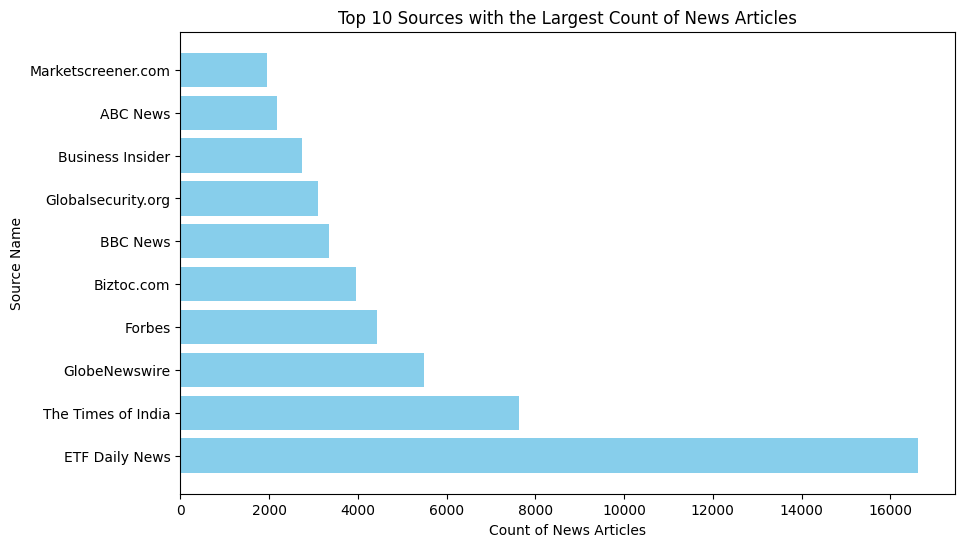

In [15]:
top_10_largest_count_df = top_10_largest_count.reset_index()
top_10_largest_count_df.columns = ['source_name', 'count']

# Plotting
plt.figure(figsize=(10, 6)) # Adjust the figure size as needed
plt.barh(top_10_largest_count_df['source_name'], top_10_largest_count_df['count'], color='skyblue')
plt.xlabel('Count of News Articles')
plt.ylabel('Source Name')
plt.title('Top 10 Sources with the Largest Count of News Articles')
plt.show()

## Bottom 10 websites that have the smallest count of news articles

In [9]:
bottom_10_largest_count = data['source_name'].value_counts(ascending=True).head(10)
print(bottom_10_largest_count)

source_name
Omnigroup.com            1
Fresno Bee               1
Cs.ru.nl                 1
Labnol.org               1
Theedgemalaysia.com      1
Schwab.com               1
Amd.com                  1
Bubbyandbean.com         1
Thriftydecorchick.com    1
Phpclasses.org           1
Name: count, dtype: int64


In [14]:
top_10_largest_count = traffic['IDN_Domain'].value_counts().head(10)
print(top_10_largest_count)

IDN_Domain
google.com               1
boardroomsecrets.info    1
temat24.co.pl            1
ip-tv.rs                 1
i-camsystems.co.uk       1
lavery.ca                1
manulife-insurance.ca    1
indiahospitality.cf      1
cspiii.com               1
dark0de-markets.com      1
Name: count, dtype: int64


In [11]:
top_10_largest_count = data['category'].value_counts().head(10)
print(top_10_largest_count)

category
Stock          3999
Health         2594
Finance        2402
Technology     2371
Real estate    2352
Canada         2324
News           1852
COVID          1821
Education      1771
Food           1613
Name: count, dtype: int64


## Top 10 with the highest count of positive, neutral, and negative sentiment

In [14]:
# Group data by 'source_name' and 'title_sentiment'
grouped_data = rating.groupby(['source_name', 'title_sentiment']).size()

# Calculate mean for each 'source_name' and 'title_sentiment' group
mean_statistics = grouped_data.groupby(['source_name', 'title_sentiment']).mean()

# Get the top 10 websites with the highest mean for positive title sentiment
top_positive_websites = mean_statistics.loc[(slice(None), 'Positive')].nlargest(10)

# Get the top 10 websites with the highest mean for neutral title sentiment
top_neutral_websites = mean_statistics.loc[(slice(None), 'Neutral')].nlargest(10)

# Get the top 10 websites with the highest mean for negative title sentiment
top_negative_websites = mean_statistics.loc[(slice(None), 'Negative')].nlargest(10)

# Print the top 10 websites based on mean for positive title sentiment
print("Top 10 Websites with Highest Mean for Positive Title Sentiment:")
print(top_positive_websites)
print()

# Print the top 10 websites based on mean for neutral title sentiment
print("Top 10 Websites with Highest Mean for Neutral Title Sentiment:")
print(top_neutral_websites)
print()

# Print the top 10 websites based on mean for negative title sentiment
print("Top 10 Websites with Highest Mean for Negative Title Sentiment:")
print(top_negative_websites)

Top 10 Websites with Highest Mean for Positive Title Sentiment:
source_name
The Times of India    1145.0
ETF Daily News         992.0
GlobeNewswire          905.0
Forbes                 635.0
Digital Trends         406.0
Android Central        272.0
Business Insider       237.0
Boing Boing            170.0
Marketscreener.com     153.0
Phys.Org               143.0
dtype: float64

Top 10 Websites with Highest Mean for Neutral Title Sentiment:
source_name
ETF Daily News        15194.0
The Times of India     5149.0
GlobeNewswire          4491.0
Globalsecurity.org     2255.0
Forbes                 1933.0
The Punch              1229.0
ABC News               1193.0
BBC News               1185.0
Marketscreener.com     1167.0
Al Jazeera English      927.0
dtype: float64

Top 10 Websites with Highest Mean for Negative Title Sentiment:
source_name
The Times of India              1210.0
Business Insider                 890.0
BBC News                         854.0
Globalsecurity.org               7

## Bottom 10 with the lowest count of positive, neutral, and negative sentiment

Bottom 10 Websites with Lowest Mean for Positive Title Sentiment:
source_name
Euronews                        15.0
CNN                             23.0
RT                              27.0
Al Jazeera English              31.0
Time                            33.0
International Business Times    44.0
Deadline                        54.0
Gizmodo.com                     59.0
The Verge                       61.0
Wired                           67.0
dtype: float64

Bottom 10 Websites with Lowest Mean for Neutral Title Sentiment:
source_name
AllAfrica - Top Africa News     12.0
The Verge                      118.0
Wired                          138.0
CNN                            142.0
Euronews                       157.0
Android Central                212.0
ReadWrite                      216.0
Gizmodo.com                    253.0
Boing Boing                    293.0
Digital Trends                 335.0
dtype: float64

Bottom 10 Websites with Lowest Mean for Negative Title Sentiment:
source_

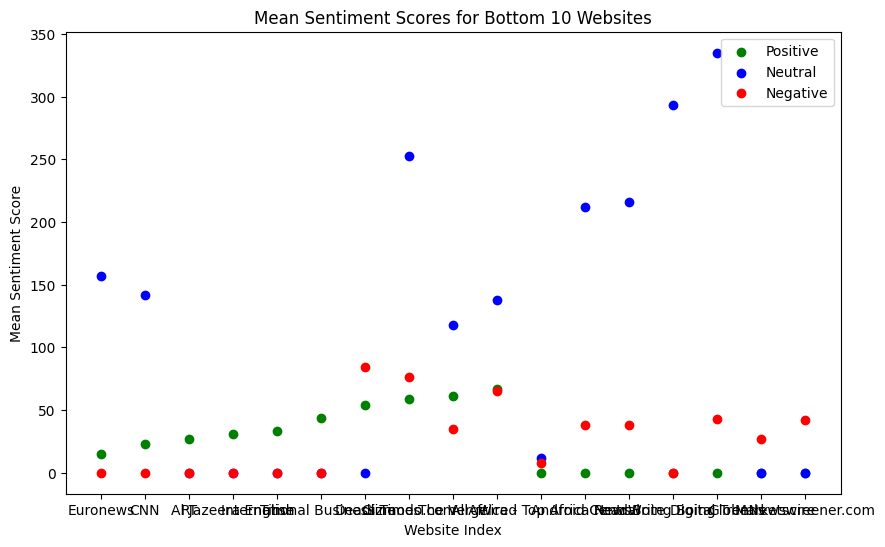

In [20]:
# Group data by 'source_name' and 'title_sentiment'
grouped_data = rating.groupby(['source_name', 'title_sentiment']).size()

# Calculate mean for each 'source_name' and 'title_sentiment' group
mean_statistics = grouped_data.groupby(['source_name', 'title_sentiment']).mean()

# Get the bottom 10 websites with the lowest mean for positive title sentiment
bottom_positive_websites = mean_statistics.loc[(slice(None), 'Positive')].nsmallest(10)

# Get the bottom 10 websites with the lowest mean for neutral title sentiment
bottom_neutral_websites = mean_statistics.loc[(slice(None), 'Neutral')].nsmallest(10)

# Get the bottom 10 websites with the lowest mean for negative title sentiment
bottom_negative_websites = mean_statistics.loc[(slice(None), 'Negative')].nsmallest(10)

# Print the bottom 10 websites based on mean for positive title sentiment
print("Bottom 10 Websites with Lowest Mean for Positive Title Sentiment:")
print(bottom_positive_websites)
print()

# Print the bottom 10 websites based on mean for neutral title sentiment
print("Bottom 10 Websites with Lowest Mean for Neutral Title Sentiment:")
print(bottom_neutral_websites)
print()

# Print the bottom 10 websites based on mean for negative title sentiment
print("Bottom 10 Websites with Lowest Mean for Negative Title Sentiment:")
print(bottom_negative_websites)

# Convert each Series to a DataFrame and rename the column
bottom_positive_websites_df = bottom_positive_websites.to_frame(name='Positive')
bottom_neutral_websites_df = bottom_neutral_websites.to_frame(name='Neutral')
bottom_negative_websites_df = bottom_negative_websites.to_frame(name='Negative')

# Combine the data into a single DataFrame
combined_data = pd.concat([
    bottom_positive_websites_df,
    bottom_neutral_websites_df,
    bottom_negative_websites_df
], axis=1)

# Fill NaN values with 0 (assuming you want to plot these as well)
combined_data.fillna(0, inplace=True)

# Plotting
plt.figure(figsize=(10, 6)) # Adjust the figure size as needed
plt.scatter(combined_data.index, combined_data['Positive'], color='green', label='Positive')
plt.scatter(combined_data.index, combined_data['Neutral'], color='blue', label='Neutral')
plt.scatter(combined_data.index, combined_data['Negative'], color='red', label='Negative')
plt.xlabel('Website Index')
plt.ylabel('Mean Sentiment Score')
plt.title('Mean Sentiment Scores for Bottom 10 Websites')
plt.legend()
plt.show()

##Top 10 Websites with the highest numbers of visitors traffic

In [6]:
# Parsing 'url' in 'data' and adding as 'Domain'
data['Domain'] = data['url'].apply(lambda x: parse_url(x).netloc)

# Merging 'data' and 'traffic' datasets
merged_df = pd.merge(data, traffic, left_on='Domain', right_on='Domain', how='left')

# Group by 'source_name' and sum the traffic metrics (e.g., 'RefIPs')
most_visited_news_sites = merged_df.groupby('source_name')['RefIPs'].sum().sort_values(ascending=False)


# Print the top 10 news sites with the highest traffic
print(most_visited_news_sites.head(10))

source_name
The Times of India             135680860.0
Time                            80895760.0
Phys.Org                        62844240.0
The Indian Express              47347784.0
Deadline                        40268070.0
Gizmodo.com                     26419200.0
New York Post                   25782390.0
Boing Boing                     20997864.0
The Punch                       19423794.0
AllAfrica - Top Africa News     18500757.0
Name: RefIPs, dtype: float64
